# Import Library

In [405]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik

import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Memuat Dataset

In [329]:
df = pd.read_csv('/content/ulasan_app_twitter.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    5000 non-null   object
 1   Rating       5000 non-null   int64 
 2   Review Text  5000 non-null   object
 3   Date         5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


# Data Preprocessing

In [330]:
# Mengecek tipe data setelah perubahan
print(df.dtypes)


Review ID      object
Rating          int64
Review Text    object
Date           object
dtype: object


In [331]:
# Mengecek missing values dan duplikat dalam dataset
missing_values = df.isnull().sum()
duplicate_values = df.duplicated().sum()

# Menampilkan hasil
print("Missing Values per Kolom:")
print(missing_values)

print("\nJumlah Duplikat Data:", duplicate_values)

Missing Values per Kolom:
Review ID      0
Rating         0
Review Text    0
Date           0
dtype: int64

Jumlah Duplikat Data: 0


In [332]:
df.head(10)

,Review ID,Rating,Review Text,Date
0,9292409b-4a28-4d9e-9446-83346dc2c609,1,Aplikasi sampah!!!!!! Selalu verifikasi mulu a...,2025-04-09 11:19:41
1,1ff43bf1-5f75-4ad9-835f-c352974242f0,1,"JELEK BANGET SUMPAH, MASA HARUS DI UPDATE MELU...",2025-04-09 11:07:03
2,d7b5bb73-d500-4374-b170-53ded9dfef39,1,anda melampaui batas percobaan ponsel anda lah...,2025-04-09 11:04:44
3,342b0a45-1d5b-4c82-b522-db5a7e91a5be,1,"x nih makin lama makin nyeselin ya, orang gak ...",2025-04-09 11:04:07
4,bb4f91fe-ff68-485e-924e-28cc32f49d75,5,AS LONG AS MY X ACCOUNT IS NOT SUSPENDED I WIL...,2025-04-09 10:58:15
5,e6b54034-5268-4a86-962f-d7d30e2c3f99,4,tolong jangan selalu akun ditangguhkan,2025-04-09 10:56:13
6,20e7bba2-6ec7-4244-ae7f-664aeef5854b,3,kenapa gampang eror padahal udah ganti akun loh,2025-04-09 10:52:14
7,608684da-159a-42f6-a26c-dd50a81c07f6,2,tadinya pakai x lumayan enak meskipun sering b...,2025-04-09 10:40:06
8,c8d628f4-a0b6-46c7-b4f7-6b3237872b0f,5,bisa nonton bokep,2025-04-09 10:30:47
9,4d538ac7-a5aa-42c3-8c23-221c5b9e2ac7,1,This app is getting more and more broken and d...,2025-04-09 10:28:22


# Preprocessing Text

In [418]:
def cleaningText(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'\bRT\b', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Menghapus karakter non-ASCII (termasuk emoji)
    text = text.strip()

    return text

# Terapkan pembersihan pada kolom 'Reviwe text' dan simpan di kolom baru 'cleaning'
df['cleaning'] = df['Review Text'].apply(cleaningText)

df.head(10)

,Review ID,Rating,Review Text,Date,cleaning,case folding,tokenized,stopword,stemming,text akhir,Sentiment
0,9292409b-4a28-4d9e-9446-83346dc2c609,1,Aplikasi sampah!!!!!! Selalu verifikasi mulu a...,2025-04-09 11:19:41,Aplikasi sampah Selalu verifikasi mulu aplikas...,aplikasi sampah selalu verifikasi mulu aplikas...,"[aplikasi, sampah, selalu, verifikasi, mulu, a...","[aplikasi, sampah, verifikasi, mulu, aplikasi,...","[aplikasi, sampah, verifikasi, mulu, aplikasi,...",aplikasi sampah verifikasi mulu aplikasi sampah,negative
1,1ff43bf1-5f75-4ad9-835f-c352974242f0,1,"JELEK BANGET SUMPAH, MASA HARUS DI UPDATE MELU...",2025-04-09 11:07:03,JELEK BANGET SUMPAH MASA HARUS DI UPDATE MELULU,jelek banget sumpah masa harus di update melulu,"[jelek, banget, sumpah, masa, harus, di, updat...","[jelek, banget, sumpah, update, melulu]","[jelek, banget, sumpah, update, melulu]",jelek banget sumpah update melulu,negative
2,d7b5bb73-d500-4374-b170-53ded9dfef39,1,anda melampaui batas percobaan ponsel anda lah...,2025-04-09 11:04:44,anda melampaui batas percobaan ponsel anda lah...,anda melampaui batas percobaan ponsel anda lah...,"[anda, melampaui, batas, percobaan, ponsel, an...","[melampaui, batas, percobaan, ponsel, nunggu, ...","[lampau, batas, coba, ponsel, nunggu, sampe, b...",lampau batas coba ponsel nunggu sampe babi twi...,negative
3,342b0a45-1d5b-4c82-b522-db5a7e91a5be,1,"x nih makin lama makin nyeselin ya, orang gak ...",2025-04-09 11:04:07,x nih makin lama makin nyeselin ya orang gak n...,x nih makin lama makin nyeselin ya orang gak n...,"[x, nih, makin, lama, makin, nyeselin, ya, ora...","[x, nih, nyeselin, ya, orang, gak, ngapain, ke...","[x, nih, nyeselin, ya, orang, gak, ngapain, ke...",x nih nyeselin ya orang gak ngapain kena suspend,negative
4,bb4f91fe-ff68-485e-924e-28cc32f49d75,5,AS LONG AS MY X ACCOUNT IS NOT SUSPENDED I WIL...,2025-04-09 10:58:15,AS LONG AS MY X ACCOUNT IS NOT SUSPENDED I WIL...,as long as my x account is not suspended i wil...,"[as, long, as, my, x, account, is, not, suspen...","[as, long, as, my, x, account, is, not, suspen...","[as, long, as, my, x, account, is, not, suspen...",as long as my x account is not suspended i wil...,neutral
5,e6b54034-5268-4a86-962f-d7d30e2c3f99,4,tolong jangan selalu akun ditangguhkan,2025-04-09 10:56:13,tolong jangan selalu akun ditangguhkan,tolong jangan selalu akun ditangguhkan,"[tolong, jangan, selalu, akun, ditangguhkan]","[tolong, akun, ditangguhkan]","[tolong, akun, tangguh]",tolong akun tangguh,neutral
6,20e7bba2-6ec7-4244-ae7f-664aeef5854b,3,kenapa gampang eror padahal udah ganti akun loh,2025-04-09 10:52:14,kenapa gampang eror padahal udah ganti akun loh,kenapa gampang eror padahal udah ganti akun loh,"[kenapa, gampang, eror, padahal, udah, ganti, ...","[gampang, eror, udah, ganti, akun, loh]","[gampang, eror, udah, ganti, akun, loh]",gampang eror udah ganti akun loh,negative
7,608684da-159a-42f6-a26c-dd50a81c07f6,2,tadinya pakai x lumayan enak meskipun sering b...,2025-04-09 10:40:06,tadinya pakai x lumayan enak meskipun sering b...,tadinya pakai x lumayan enak meskipun sering b...,"[tadinya, pakai, x, lumayan, enak, meskipun, s...","[pakai, x, lumayan, enak, bgt, log, out, tbtb,...","[pakai, x, lumayan, enak, bgt, log, out, tbtb,...",pakai x lumayan enak bgt log out tbtb kunci ee...,negative
8,c8d628f4-a0b6-46c7-b4f7-6b3237872b0f,5,bisa nonton bokep,2025-04-09 10:30:47,bisa nonton bokep,bisa nonton bokep,"[bisa, nonton, bokep]","[nonton, bokep]","[nonton, bokep]",nonton bokep,negative
9,4d538ac7-a5aa-42c3-8c23-221c5b9e2ac7,1,This app is getting more and more broken and d...,2025-04-09 10:28:22,This app is getting more and more broken and d...,this app is getting more and more broken and d...,"[this, app, is, getting, more, and, more, brok...","[this, app, is, getting, more, and, more, brok...","[this, app, is, getting, more, and, more, brok...",this app is getting more and more broken and d...,neutral


In [334]:
def case_folding(text):
    if isinstance(text, str):
        return text.lower()  # Mengubah teks menjadi huruf kecil
    return text

# Terapkan case folding pada kolom 'cleaning' dan simpan hasilnya di kolom baru 'case_folding'
df['case folding'] = df['cleaning'].apply(case_folding)

df.head(10)

,Review ID,Rating,Review Text,Date,cleaning,case folding
0,9292409b-4a28-4d9e-9446-83346dc2c609,1,Aplikasi sampah!!!!!! Selalu verifikasi mulu a...,2025-04-09 11:19:41,Aplikasi sampah Selalu verifikasi mulu aplikas...,aplikasi sampah selalu verifikasi mulu aplikas...
1,1ff43bf1-5f75-4ad9-835f-c352974242f0,1,"JELEK BANGET SUMPAH, MASA HARUS DI UPDATE MELU...",2025-04-09 11:07:03,JELEK BANGET SUMPAH MASA HARUS DI UPDATE MELULU,jelek banget sumpah masa harus di update melulu
2,d7b5bb73-d500-4374-b170-53ded9dfef39,1,anda melampaui batas percobaan ponsel anda lah...,2025-04-09 11:04:44,anda melampaui batas percobaan ponsel anda lah...,anda melampaui batas percobaan ponsel anda lah...
3,342b0a45-1d5b-4c82-b522-db5a7e91a5be,1,"x nih makin lama makin nyeselin ya, orang gak ...",2025-04-09 11:04:07,x nih makin lama makin nyeselin ya orang gak n...,x nih makin lama makin nyeselin ya orang gak n...
4,bb4f91fe-ff68-485e-924e-28cc32f49d75,5,AS LONG AS MY X ACCOUNT IS NOT SUSPENDED I WIL...,2025-04-09 10:58:15,AS LONG AS MY X ACCOUNT IS NOT SUSPENDED I WIL...,as long as my x account is not suspended i wil...
5,e6b54034-5268-4a86-962f-d7d30e2c3f99,4,tolong jangan selalu akun ditangguhkan,2025-04-09 10:56:13,tolong jangan selalu akun ditangguhkan,tolong jangan selalu akun ditangguhkan
6,20e7bba2-6ec7-4244-ae7f-664aeef5854b,3,kenapa gampang eror padahal udah ganti akun loh,2025-04-09 10:52:14,kenapa gampang eror padahal udah ganti akun loh,kenapa gampang eror padahal udah ganti akun loh
7,608684da-159a-42f6-a26c-dd50a81c07f6,2,tadinya pakai x lumayan enak meskipun sering b...,2025-04-09 10:40:06,tadinya pakai x lumayan enak meskipun sering b...,tadinya pakai x lumayan enak meskipun sering b...
8,c8d628f4-a0b6-46c7-b4f7-6b3237872b0f,5,bisa nonton bokep,2025-04-09 10:30:47,bisa nonton bokep,bisa nonton bokep
9,4d538ac7-a5aa-42c3-8c23-221c5b9e2ac7,1,This app is getting more and more broken and d...,2025-04-09 10:28:22,This app is getting more and more broken and d...,this app is getting more and more broken and d...


In [335]:
def tokenizing(text):
    if isinstance(text, str):
        return word_tokenize(text)  # Memecah teks menjadi kata-kata
    return text

# Terapkan word tokenization pada kolom 'case folding' dan simpan hasilnya di kolom baru 'word_tokenized'
df['tokenized'] = df['case folding'].apply(tokenizing)

df.head(10)

,Review ID,Rating,Review Text,Date,cleaning,case folding,tokenized
0,9292409b-4a28-4d9e-9446-83346dc2c609,1,Aplikasi sampah!!!!!! Selalu verifikasi mulu a...,2025-04-09 11:19:41,Aplikasi sampah Selalu verifikasi mulu aplikas...,aplikasi sampah selalu verifikasi mulu aplikas...,"[aplikasi, sampah, selalu, verifikasi, mulu, a..."
1,1ff43bf1-5f75-4ad9-835f-c352974242f0,1,"JELEK BANGET SUMPAH, MASA HARUS DI UPDATE MELU...",2025-04-09 11:07:03,JELEK BANGET SUMPAH MASA HARUS DI UPDATE MELULU,jelek banget sumpah masa harus di update melulu,"[jelek, banget, sumpah, masa, harus, di, updat..."
2,d7b5bb73-d500-4374-b170-53ded9dfef39,1,anda melampaui batas percobaan ponsel anda lah...,2025-04-09 11:04:44,anda melampaui batas percobaan ponsel anda lah...,anda melampaui batas percobaan ponsel anda lah...,"[anda, melampaui, batas, percobaan, ponsel, an..."
3,342b0a45-1d5b-4c82-b522-db5a7e91a5be,1,"x nih makin lama makin nyeselin ya, orang gak ...",2025-04-09 11:04:07,x nih makin lama makin nyeselin ya orang gak n...,x nih makin lama makin nyeselin ya orang gak n...,"[x, nih, makin, lama, makin, nyeselin, ya, ora..."
4,bb4f91fe-ff68-485e-924e-28cc32f49d75,5,AS LONG AS MY X ACCOUNT IS NOT SUSPENDED I WIL...,2025-04-09 10:58:15,AS LONG AS MY X ACCOUNT IS NOT SUSPENDED I WIL...,as long as my x account is not suspended i wil...,"[as, long, as, my, x, account, is, not, suspen..."
5,e6b54034-5268-4a86-962f-d7d30e2c3f99,4,tolong jangan selalu akun ditangguhkan,2025-04-09 10:56:13,tolong jangan selalu akun ditangguhkan,tolong jangan selalu akun ditangguhkan,"[tolong, jangan, selalu, akun, ditangguhkan]"
6,20e7bba2-6ec7-4244-ae7f-664aeef5854b,3,kenapa gampang eror padahal udah ganti akun loh,2025-04-09 10:52:14,kenapa gampang eror padahal udah ganti akun loh,kenapa gampang eror padahal udah ganti akun loh,"[kenapa, gampang, eror, padahal, udah, ganti, ..."
7,608684da-159a-42f6-a26c-dd50a81c07f6,2,tadinya pakai x lumayan enak meskipun sering b...,2025-04-09 10:40:06,tadinya pakai x lumayan enak meskipun sering b...,tadinya pakai x lumayan enak meskipun sering b...,"[tadinya, pakai, x, lumayan, enak, meskipun, s..."
8,c8d628f4-a0b6-46c7-b4f7-6b3237872b0f,5,bisa nonton bokep,2025-04-09 10:30:47,bisa nonton bokep,bisa nonton bokep,"[bisa, nonton, bokep]"
9,4d538ac7-a5aa-42c3-8c23-221c5b9e2ac7,1,This app is getting more and more broken and d...,2025-04-09 10:28:22,This app is getting more and more broken and d...,this app is getting more and more broken and d...,"[this, app, is, getting, more, and, more, brok..."


In [336]:
# Filtering

#Menghapus kata yang tidak penting
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(text):
    # Memisahkan teks menjadi kata-kata, lalu menghapus stopwords dari NLTK
    return [word for word in text if word.lower() not in stop_words]

# Terapkan fungsi stopword removal ke kolom 'tokenize' dan simpan hasilnya di kolom 'stopword'
df['stopword'] = df['tokenized'].apply(remove_stopwords)

# Menampilkan hasil untuk memeriksa apakah stopword removal sudah berhasil
df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Review ID,Rating,Review Text,Date,cleaning,case folding,tokenized,stopword
0,9292409b-4a28-4d9e-9446-83346dc2c609,1,Aplikasi sampah!!!!!! Selalu verifikasi mulu a...,2025-04-09 11:19:41,Aplikasi sampah Selalu verifikasi mulu aplikas...,aplikasi sampah selalu verifikasi mulu aplikas...,"[aplikasi, sampah, selalu, verifikasi, mulu, a...","[aplikasi, sampah, verifikasi, mulu, aplikasi,..."
1,1ff43bf1-5f75-4ad9-835f-c352974242f0,1,"JELEK BANGET SUMPAH, MASA HARUS DI UPDATE MELU...",2025-04-09 11:07:03,JELEK BANGET SUMPAH MASA HARUS DI UPDATE MELULU,jelek banget sumpah masa harus di update melulu,"[jelek, banget, sumpah, masa, harus, di, updat...","[jelek, banget, sumpah, update, melulu]"
2,d7b5bb73-d500-4374-b170-53ded9dfef39,1,anda melampaui batas percobaan ponsel anda lah...,2025-04-09 11:04:44,anda melampaui batas percobaan ponsel anda lah...,anda melampaui batas percobaan ponsel anda lah...,"[anda, melampaui, batas, percobaan, ponsel, an...","[melampaui, batas, percobaan, ponsel, nunggu, ..."
3,342b0a45-1d5b-4c82-b522-db5a7e91a5be,1,"x nih makin lama makin nyeselin ya, orang gak ...",2025-04-09 11:04:07,x nih makin lama makin nyeselin ya orang gak n...,x nih makin lama makin nyeselin ya orang gak n...,"[x, nih, makin, lama, makin, nyeselin, ya, ora...","[x, nih, nyeselin, ya, orang, gak, ngapain, ke..."
4,bb4f91fe-ff68-485e-924e-28cc32f49d75,5,AS LONG AS MY X ACCOUNT IS NOT SUSPENDED I WIL...,2025-04-09 10:58:15,AS LONG AS MY X ACCOUNT IS NOT SUSPENDED I WIL...,as long as my x account is not suspended i wil...,"[as, long, as, my, x, account, is, not, suspen...","[as, long, as, my, x, account, is, not, suspen..."
5,e6b54034-5268-4a86-962f-d7d30e2c3f99,4,tolong jangan selalu akun ditangguhkan,2025-04-09 10:56:13,tolong jangan selalu akun ditangguhkan,tolong jangan selalu akun ditangguhkan,"[tolong, jangan, selalu, akun, ditangguhkan]","[tolong, akun, ditangguhkan]"
6,20e7bba2-6ec7-4244-ae7f-664aeef5854b,3,kenapa gampang eror padahal udah ganti akun loh,2025-04-09 10:52:14,kenapa gampang eror padahal udah ganti akun loh,kenapa gampang eror padahal udah ganti akun loh,"[kenapa, gampang, eror, padahal, udah, ganti, ...","[gampang, eror, udah, ganti, akun, loh]"
7,608684da-159a-42f6-a26c-dd50a81c07f6,2,tadinya pakai x lumayan enak meskipun sering b...,2025-04-09 10:40:06,tadinya pakai x lumayan enak meskipun sering b...,tadinya pakai x lumayan enak meskipun sering b...,"[tadinya, pakai, x, lumayan, enak, meskipun, s...","[pakai, x, lumayan, enak, bgt, log, out, tbtb,..."
8,c8d628f4-a0b6-46c7-b4f7-6b3237872b0f,5,bisa nonton bokep,2025-04-09 10:30:47,bisa nonton bokep,bisa nonton bokep,"[bisa, nonton, bokep]","[nonton, bokep]"
9,4d538ac7-a5aa-42c3-8c23-221c5b9e2ac7,1,This app is getting more and more broken and d...,2025-04-09 10:28:22,This app is getting more and more broken and d...,this app is getting more and more broken and d...,"[this, app, is, getting, more, and, more, brok...","[this, app, is, getting, more, and, more, brok..."


In [337]:
# Stemming

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    stemmed_text = [stemmer.stem(word) for word in text]
    return stemmed_text

# Terapkan fungsi stemming ke kolom 'sstopword' dan simpan hasilnya di kolom 'stemming'
df['stemming'] = df['stopword'].apply(stemming)

df.head(10)


,Review ID,Rating,Review Text,Date,cleaning,case folding,tokenized,stopword,stemming
0,9292409b-4a28-4d9e-9446-83346dc2c609,1,Aplikasi sampah!!!!!! Selalu verifikasi mulu a...,2025-04-09 11:19:41,Aplikasi sampah Selalu verifikasi mulu aplikas...,aplikasi sampah selalu verifikasi mulu aplikas...,"[aplikasi, sampah, selalu, verifikasi, mulu, a...","[aplikasi, sampah, verifikasi, mulu, aplikasi,...","[aplikasi, sampah, verifikasi, mulu, aplikasi,..."
1,1ff43bf1-5f75-4ad9-835f-c352974242f0,1,"JELEK BANGET SUMPAH, MASA HARUS DI UPDATE MELU...",2025-04-09 11:07:03,JELEK BANGET SUMPAH MASA HARUS DI UPDATE MELULU,jelek banget sumpah masa harus di update melulu,"[jelek, banget, sumpah, masa, harus, di, updat...","[jelek, banget, sumpah, update, melulu]","[jelek, banget, sumpah, update, melulu]"
2,d7b5bb73-d500-4374-b170-53ded9dfef39,1,anda melampaui batas percobaan ponsel anda lah...,2025-04-09 11:04:44,anda melampaui batas percobaan ponsel anda lah...,anda melampaui batas percobaan ponsel anda lah...,"[anda, melampaui, batas, percobaan, ponsel, an...","[melampaui, batas, percobaan, ponsel, nunggu, ...","[lampau, batas, coba, ponsel, nunggu, sampe, b..."
3,342b0a45-1d5b-4c82-b522-db5a7e91a5be,1,"x nih makin lama makin nyeselin ya, orang gak ...",2025-04-09 11:04:07,x nih makin lama makin nyeselin ya orang gak n...,x nih makin lama makin nyeselin ya orang gak n...,"[x, nih, makin, lama, makin, nyeselin, ya, ora...","[x, nih, nyeselin, ya, orang, gak, ngapain, ke...","[x, nih, nyeselin, ya, orang, gak, ngapain, ke..."
4,bb4f91fe-ff68-485e-924e-28cc32f49d75,5,AS LONG AS MY X ACCOUNT IS NOT SUSPENDED I WIL...,2025-04-09 10:58:15,AS LONG AS MY X ACCOUNT IS NOT SUSPENDED I WIL...,as long as my x account is not suspended i wil...,"[as, long, as, my, x, account, is, not, suspen...","[as, long, as, my, x, account, is, not, suspen...","[as, long, as, my, x, account, is, not, suspen..."
5,e6b54034-5268-4a86-962f-d7d30e2c3f99,4,tolong jangan selalu akun ditangguhkan,2025-04-09 10:56:13,tolong jangan selalu akun ditangguhkan,tolong jangan selalu akun ditangguhkan,"[tolong, jangan, selalu, akun, ditangguhkan]","[tolong, akun, ditangguhkan]","[tolong, akun, tangguh]"
6,20e7bba2-6ec7-4244-ae7f-664aeef5854b,3,kenapa gampang eror padahal udah ganti akun loh,2025-04-09 10:52:14,kenapa gampang eror padahal udah ganti akun loh,kenapa gampang eror padahal udah ganti akun loh,"[kenapa, gampang, eror, padahal, udah, ganti, ...","[gampang, eror, udah, ganti, akun, loh]","[gampang, eror, udah, ganti, akun, loh]"
7,608684da-159a-42f6-a26c-dd50a81c07f6,2,tadinya pakai x lumayan enak meskipun sering b...,2025-04-09 10:40:06,tadinya pakai x lumayan enak meskipun sering b...,tadinya pakai x lumayan enak meskipun sering b...,"[tadinya, pakai, x, lumayan, enak, meskipun, s...","[pakai, x, lumayan, enak, bgt, log, out, tbtb,...","[pakai, x, lumayan, enak, bgt, log, out, tbtb,..."
8,c8d628f4-a0b6-46c7-b4f7-6b3237872b0f,5,bisa nonton bokep,2025-04-09 10:30:47,bisa nonton bokep,bisa nonton bokep,"[bisa, nonton, bokep]","[nonton, bokep]","[nonton, bokep]"
9,4d538ac7-a5aa-42c3-8c23-221c5b9e2ac7,1,This app is getting more and more broken and d...,2025-04-09 10:28:22,This app is getting more and more broken and d...,this app is getting more and more broken and d...,"[this, app, is, getting, more, and, more, brok...","[this, app, is, getting, more, and, more, brok...","[this, app, is, getting, more, and, more, brok..."


In [338]:
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df['text akhir'] = df['stemming'].apply(toSentence)

df.head(10)

,Review ID,Rating,Review Text,Date,cleaning,case folding,tokenized,stopword,stemming,text akhir
0,9292409b-4a28-4d9e-9446-83346dc2c609,1,Aplikasi sampah!!!!!! Selalu verifikasi mulu a...,2025-04-09 11:19:41,Aplikasi sampah Selalu verifikasi mulu aplikas...,aplikasi sampah selalu verifikasi mulu aplikas...,"[aplikasi, sampah, selalu, verifikasi, mulu, a...","[aplikasi, sampah, verifikasi, mulu, aplikasi,...","[aplikasi, sampah, verifikasi, mulu, aplikasi,...",aplikasi sampah verifikasi mulu aplikasi sampah
1,1ff43bf1-5f75-4ad9-835f-c352974242f0,1,"JELEK BANGET SUMPAH, MASA HARUS DI UPDATE MELU...",2025-04-09 11:07:03,JELEK BANGET SUMPAH MASA HARUS DI UPDATE MELULU,jelek banget sumpah masa harus di update melulu,"[jelek, banget, sumpah, masa, harus, di, updat...","[jelek, banget, sumpah, update, melulu]","[jelek, banget, sumpah, update, melulu]",jelek banget sumpah update melulu
2,d7b5bb73-d500-4374-b170-53ded9dfef39,1,anda melampaui batas percobaan ponsel anda lah...,2025-04-09 11:04:44,anda melampaui batas percobaan ponsel anda lah...,anda melampaui batas percobaan ponsel anda lah...,"[anda, melampaui, batas, percobaan, ponsel, an...","[melampaui, batas, percobaan, ponsel, nunggu, ...","[lampau, batas, coba, ponsel, nunggu, sampe, b...",lampau batas coba ponsel nunggu sampe babi twi...
3,342b0a45-1d5b-4c82-b522-db5a7e91a5be,1,"x nih makin lama makin nyeselin ya, orang gak ...",2025-04-09 11:04:07,x nih makin lama makin nyeselin ya orang gak n...,x nih makin lama makin nyeselin ya orang gak n...,"[x, nih, makin, lama, makin, nyeselin, ya, ora...","[x, nih, nyeselin, ya, orang, gak, ngapain, ke...","[x, nih, nyeselin, ya, orang, gak, ngapain, ke...",x nih nyeselin ya orang gak ngapain kena suspend
4,bb4f91fe-ff68-485e-924e-28cc32f49d75,5,AS LONG AS MY X ACCOUNT IS NOT SUSPENDED I WIL...,2025-04-09 10:58:15,AS LONG AS MY X ACCOUNT IS NOT SUSPENDED I WIL...,as long as my x account is not suspended i wil...,"[as, long, as, my, x, account, is, not, suspen...","[as, long, as, my, x, account, is, not, suspen...","[as, long, as, my, x, account, is, not, suspen...",as long as my x account is not suspended i wil...
5,e6b54034-5268-4a86-962f-d7d30e2c3f99,4,tolong jangan selalu akun ditangguhkan,2025-04-09 10:56:13,tolong jangan selalu akun ditangguhkan,tolong jangan selalu akun ditangguhkan,"[tolong, jangan, selalu, akun, ditangguhkan]","[tolong, akun, ditangguhkan]","[tolong, akun, tangguh]",tolong akun tangguh
6,20e7bba2-6ec7-4244-ae7f-664aeef5854b,3,kenapa gampang eror padahal udah ganti akun loh,2025-04-09 10:52:14,kenapa gampang eror padahal udah ganti akun loh,kenapa gampang eror padahal udah ganti akun loh,"[kenapa, gampang, eror, padahal, udah, ganti, ...","[gampang, eror, udah, ganti, akun, loh]","[gampang, eror, udah, ganti, akun, loh]",gampang eror udah ganti akun loh
7,608684da-159a-42f6-a26c-dd50a81c07f6,2,tadinya pakai x lumayan enak meskipun sering b...,2025-04-09 10:40:06,tadinya pakai x lumayan enak meskipun sering b...,tadinya pakai x lumayan enak meskipun sering b...,"[tadinya, pakai, x, lumayan, enak, meskipun, s...","[pakai, x, lumayan, enak, bgt, log, out, tbtb,...","[pakai, x, lumayan, enak, bgt, log, out, tbtb,...",pakai x lumayan enak bgt log out tbtb kunci ee...
8,c8d628f4-a0b6-46c7-b4f7-6b3237872b0f,5,bisa nonton bokep,2025-04-09 10:30:47,bisa nonton bokep,bisa nonton bokep,"[bisa, nonton, bokep]","[nonton, bokep]","[nonton, bokep]",nonton bokep
9,4d538ac7-a5aa-42c3-8c23-221c5b9e2ac7,1,This app is getting more and more broken and d...,2025-04-09 10:28:22,This app is getting more and more broken and d...,this app is getting more and more broken and d...,"[this, app, is, getting, more, and, more, brok...","[this, app, is, getting, more, and, more, brok...","[this, app, is, getting, more, and, more, brok...",this app is getting more and more broken and d...


In [339]:
# Menyimpan data hasil pra pemrosessan data
df.to_csv('ulasan_app_twitter_preprocessed.csv', index=False)

# Ekspolarasi Label

In [362]:
# Melihat data yang sudah di simpan
df_processed = pd.read_csv('/content/ulasan_app_twitter_preprocessed.csv')
df_processed.head(10)

,Review ID,Rating,Review Text,Date,cleaning,case folding,tokenized,stopword,stemming,text akhir
0,9292409b-4a28-4d9e-9446-83346dc2c609,1,Aplikasi sampah!!!!!! Selalu verifikasi mulu a...,2025-04-09 11:19:41,Aplikasi sampah Selalu verifikasi mulu aplikas...,aplikasi sampah selalu verifikasi mulu aplikas...,"['aplikasi', 'sampah', 'selalu', 'verifikasi',...","['aplikasi', 'sampah', 'verifikasi', 'mulu', '...","['aplikasi', 'sampah', 'verifikasi', 'mulu', '...",aplikasi sampah verifikasi mulu aplikasi sampah
1,1ff43bf1-5f75-4ad9-835f-c352974242f0,1,"JELEK BANGET SUMPAH, MASA HARUS DI UPDATE MELU...",2025-04-09 11:07:03,JELEK BANGET SUMPAH MASA HARUS DI UPDATE MELULU,jelek banget sumpah masa harus di update melulu,"['jelek', 'banget', 'sumpah', 'masa', 'harus',...","['jelek', 'banget', 'sumpah', 'update', 'melulu']","['jelek', 'banget', 'sumpah', 'update', 'melulu']",jelek banget sumpah update melulu
2,d7b5bb73-d500-4374-b170-53ded9dfef39,1,anda melampaui batas percobaan ponsel anda lah...,2025-04-09 11:04:44,anda melampaui batas percobaan ponsel anda lah...,anda melampaui batas percobaan ponsel anda lah...,"['anda', 'melampaui', 'batas', 'percobaan', 'p...","['melampaui', 'batas', 'percobaan', 'ponsel', ...","['lampau', 'batas', 'coba', 'ponsel', 'nunggu'...",lampau batas coba ponsel nunggu sampe babi twi...
3,342b0a45-1d5b-4c82-b522-db5a7e91a5be,1,"x nih makin lama makin nyeselin ya, orang gak ...",2025-04-09 11:04:07,x nih makin lama makin nyeselin ya orang gak n...,x nih makin lama makin nyeselin ya orang gak n...,"['x', 'nih', 'makin', 'lama', 'makin', 'nyesel...","['x', 'nih', 'nyeselin', 'ya', 'orang', 'gak',...","['x', 'nih', 'nyeselin', 'ya', 'orang', 'gak',...",x nih nyeselin ya orang gak ngapain kena suspend
4,bb4f91fe-ff68-485e-924e-28cc32f49d75,5,AS LONG AS MY X ACCOUNT IS NOT SUSPENDED I WIL...,2025-04-09 10:58:15,AS LONG AS MY X ACCOUNT IS NOT SUSPENDED I WIL...,as long as my x account is not suspended i wil...,"['as', 'long', 'as', 'my', 'x', 'account', 'is...","['as', 'long', 'as', 'my', 'x', 'account', 'is...","['as', 'long', 'as', 'my', 'x', 'account', 'is...",as long as my x account is not suspended i wil...
5,e6b54034-5268-4a86-962f-d7d30e2c3f99,4,tolong jangan selalu akun ditangguhkan,2025-04-09 10:56:13,tolong jangan selalu akun ditangguhkan,tolong jangan selalu akun ditangguhkan,"['tolong', 'jangan', 'selalu', 'akun', 'ditang...","['tolong', 'akun', 'ditangguhkan']","['tolong', 'akun', 'tangguh']",tolong akun tangguh
6,20e7bba2-6ec7-4244-ae7f-664aeef5854b,3,kenapa gampang eror padahal udah ganti akun loh,2025-04-09 10:52:14,kenapa gampang eror padahal udah ganti akun loh,kenapa gampang eror padahal udah ganti akun loh,"['kenapa', 'gampang', 'eror', 'padahal', 'udah...","['gampang', 'eror', 'udah', 'ganti', 'akun', '...","['gampang', 'eror', 'udah', 'ganti', 'akun', '...",gampang eror udah ganti akun loh
7,608684da-159a-42f6-a26c-dd50a81c07f6,2,tadinya pakai x lumayan enak meskipun sering b...,2025-04-09 10:40:06,tadinya pakai x lumayan enak meskipun sering b...,tadinya pakai x lumayan enak meskipun sering b...,"['tadinya', 'pakai', 'x', 'lumayan', 'enak', '...","['pakai', 'x', 'lumayan', 'enak', 'bgt', 'log'...","['pakai', 'x', 'lumayan', 'enak', 'bgt', 'log'...",pakai x lumayan enak bgt log out tbtb kunci ee...
8,c8d628f4-a0b6-46c7-b4f7-6b3237872b0f,5,bisa nonton bokep,2025-04-09 10:30:47,bisa nonton bokep,bisa nonton bokep,"['bisa', 'nonton', 'bokep']","['nonton', 'bokep']","['nonton', 'bokep']",nonton bokep
9,4d538ac7-a5aa-42c3-8c23-221c5b9e2ac7,1,This app is getting more and more broken and d...,2025-04-09 10:28:22,This app is getting more and more broken and d...,this app is getting more and more broken and d...,"['this', 'app', 'is', 'getting', 'more', 'and'...","['this', 'app', 'is', 'getting', 'more', 'and'...","['this', 'app', 'is', 'getting', 'more', 'and'...",this app is getting more and more broken and d...


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review ID     5000 non-null   object
 1   Rating        5000 non-null   int64 
 2   Review Text   5000 non-null   object
 3   Date          5000 non-null   object
 4   cleaning      5000 non-null   object
 5   case folding  5000 non-null   object
 6   tokenized     5000 non-null   object
 7   stopword      5000 non-null   object
 8   stemming      5000 non-null   object
 9   text akhir    5000 non-null   object
 10  Sentiment     5000 non-null   object
dtypes: int64(1), object(10)
memory usage: 429.8+ KB


In [367]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = 1
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = -1
else:
    print("Failed to fetch negative lexicon data")

def sentiment_analysis_lexicon_indonesia(text):
    # Check if text is a list and join it into a string if necessary
    if isinstance(text, list):
        text = ' '.join(text)

    # Tokenisasi teks
    words = text.split()  # Memecah teks menjadi kata-kata
    score = 0  # Inisialisasi skor sentimen

    # Menghitung skor berdasarkan kamus positif dan negatif
    for word in words:
        word = word.lower()  # Mengubah kata menjadi huruf kecil untuk konsistensi

        if word in lexicon_positive:
            score += lexicon_positive[word]  # Menambah skor jika kata ada di kamus positif

        if word in lexicon_negative:
            score += lexicon_negative[word]  # Mengurangi skor jika kata ada di kamus negatif

    # Menentukan polaritas berdasarkan skor
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return polarity # Return only polarity for labeling


# Menerapkan analisis sentimen ke kolom 'Review Text'
df['Sentiment'] = df['stemming'].apply(sentiment_analysis_lexicon_indonesia)

# Menampilkan beberapa baris hasil
df.head(20)

,Review ID,Rating,Review Text,Date,cleaning,case folding,tokenized,stopword,stemming,text akhir,Sentiment
0,9292409b-4a28-4d9e-9446-83346dc2c609,1,Aplikasi sampah!!!!!! Selalu verifikasi mulu a...,2025-04-09 11:19:41,Aplikasi sampah Selalu verifikasi mulu aplikas...,aplikasi sampah selalu verifikasi mulu aplikas...,"[aplikasi, sampah, selalu, verifikasi, mulu, a...","[aplikasi, sampah, verifikasi, mulu, aplikasi,...","[aplikasi, sampah, verifikasi, mulu, aplikasi,...",aplikasi sampah verifikasi mulu aplikasi sampah,negative
1,1ff43bf1-5f75-4ad9-835f-c352974242f0,1,"JELEK BANGET SUMPAH, MASA HARUS DI UPDATE MELU...",2025-04-09 11:07:03,JELEK BANGET SUMPAH MASA HARUS DI UPDATE MELULU,jelek banget sumpah masa harus di update melulu,"[jelek, banget, sumpah, masa, harus, di, updat...","[jelek, banget, sumpah, update, melulu]","[jelek, banget, sumpah, update, melulu]",jelek banget sumpah update melulu,negative
2,d7b5bb73-d500-4374-b170-53ded9dfef39,1,anda melampaui batas percobaan ponsel anda lah...,2025-04-09 11:04:44,anda melampaui batas percobaan ponsel anda lah...,anda melampaui batas percobaan ponsel anda lah...,"[anda, melampaui, batas, percobaan, ponsel, an...","[melampaui, batas, percobaan, ponsel, nunggu, ...","[lampau, batas, coba, ponsel, nunggu, sampe, b...",lampau batas coba ponsel nunggu sampe babi twi...,negative
3,342b0a45-1d5b-4c82-b522-db5a7e91a5be,1,"x nih makin lama makin nyeselin ya, orang gak ...",2025-04-09 11:04:07,x nih makin lama makin nyeselin ya orang gak n...,x nih makin lama makin nyeselin ya orang gak n...,"[x, nih, makin, lama, makin, nyeselin, ya, ora...","[x, nih, nyeselin, ya, orang, gak, ngapain, ke...","[x, nih, nyeselin, ya, orang, gak, ngapain, ke...",x nih nyeselin ya orang gak ngapain kena suspend,negative
4,bb4f91fe-ff68-485e-924e-28cc32f49d75,5,AS LONG AS MY X ACCOUNT IS NOT SUSPENDED I WIL...,2025-04-09 10:58:15,AS LONG AS MY X ACCOUNT IS NOT SUSPENDED I WIL...,as long as my x account is not suspended i wil...,"[as, long, as, my, x, account, is, not, suspen...","[as, long, as, my, x, account, is, not, suspen...","[as, long, as, my, x, account, is, not, suspen...",as long as my x account is not suspended i wil...,neutral
5,e6b54034-5268-4a86-962f-d7d30e2c3f99,4,tolong jangan selalu akun ditangguhkan,2025-04-09 10:56:13,tolong jangan selalu akun ditangguhkan,tolong jangan selalu akun ditangguhkan,"[tolong, jangan, selalu, akun, ditangguhkan]","[tolong, akun, ditangguhkan]","[tolong, akun, tangguh]",tolong akun tangguh,neutral
6,20e7bba2-6ec7-4244-ae7f-664aeef5854b,3,kenapa gampang eror padahal udah ganti akun loh,2025-04-09 10:52:14,kenapa gampang eror padahal udah ganti akun loh,kenapa gampang eror padahal udah ganti akun loh,"[kenapa, gampang, eror, padahal, udah, ganti, ...","[gampang, eror, udah, ganti, akun, loh]","[gampang, eror, udah, ganti, akun, loh]",gampang eror udah ganti akun loh,negative
7,608684da-159a-42f6-a26c-dd50a81c07f6,2,tadinya pakai x lumayan enak meskipun sering b...,2025-04-09 10:40:06,tadinya pakai x lumayan enak meskipun sering b...,tadinya pakai x lumayan enak meskipun sering b...,"[tadinya, pakai, x, lumayan, enak, meskipun, s...","[pakai, x, lumayan, enak, bgt, log, out, tbtb,...","[pakai, x, lumayan, enak, bgt, log, out, tbtb,...",pakai x lumayan enak bgt log out tbtb kunci ee...,negative
8,c8d628f4-a0b6-46c7-b4f7-6b3237872b0f,5,bisa nonton bokep,2025-04-09 10:30:47,bisa nonton bokep,bisa nonton bokep,"[bisa, nonton, bokep]","[nonton, bokep]","[nonton, bokep]",nonton bokep,negative
9,4d538ac7-a5aa-42c3-8c23-221c5b9e2ac7,1,This app is getting more and more broken and d...,2025-04-09 10:28:22,This app is getting more and more broken and d...,this app is getting more and more broken and d...,"[this, app, is, getting, more, and, more, brok...","[this, app, is, getting, more, and, more, brok...","[this, app, is, getting, more, and, more, brok...",this app is getting more and more broken and d...,neutral


In [368]:
# Menghitung jumlah sentimen positif, negatif, dan netral
sentiment_counts = df['Sentiment'].value_counts()

# Menampilkan hasil distribusi sentimen
print(sentiment_counts)


Sentiment
neutral     2012
negative    1618
positive    1370
Name: count, dtype: int64


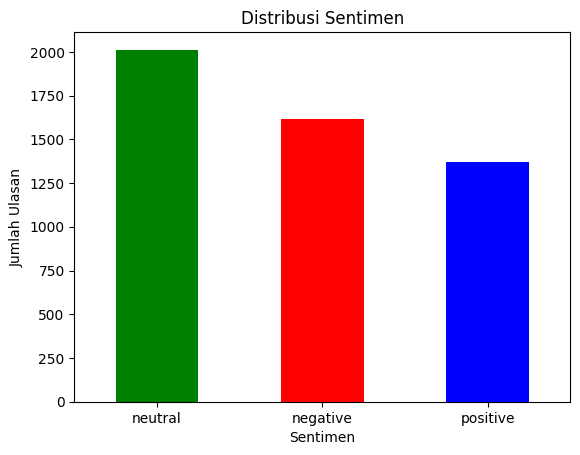

In [369]:
import matplotlib.pyplot as plt

# Membuat grafik batang untuk distribusi sentimen
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=0)
plt.show()


In [385]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan teks berdasarkan sentimen dan ubah list menjadi string
positive_text = ' '.join(df[df['Sentiment'] == 'positive']['text akhir'])
negative_text = ' '.join(df[df['Sentiment'] == 'negative']['text akhir'])
neutral_text = ' '.join(df[df['Sentiment'] == 'neutral']['text akhir'])

# Buat wordcloud untuk sentimen positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Buat wordcloud untuk sentimen negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Buat wordcloud untuk sentimen netral
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)


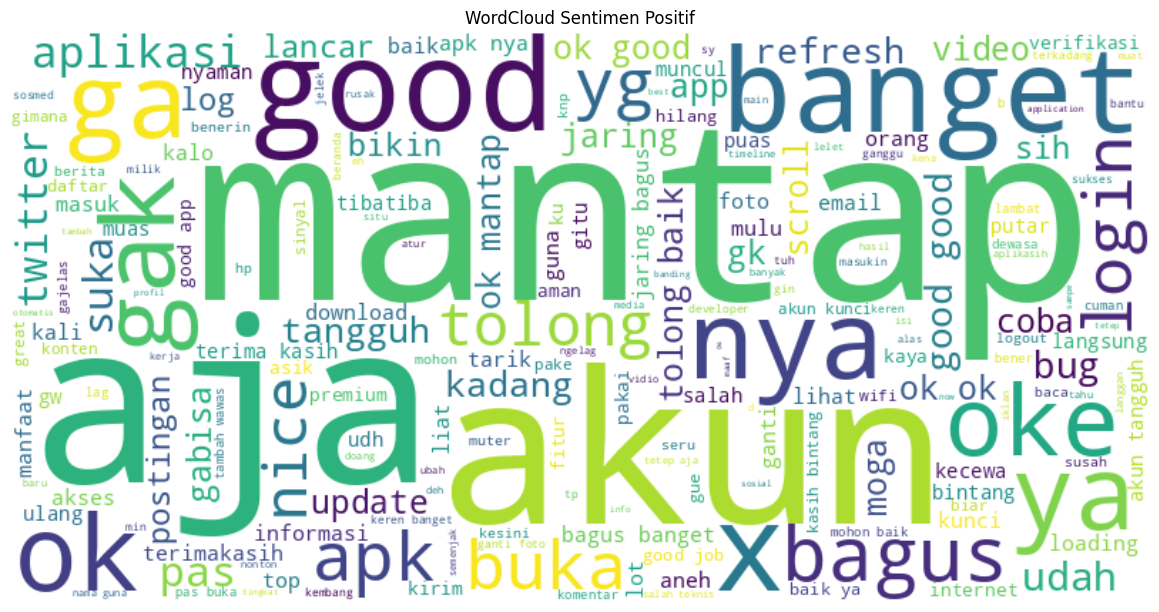

In [386]:
# Plot hasil wordcloud
plt.figure(figsize=(50, 50))
# Positif
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('WordCloud Sentimen Positif')
plt.axis('off')
plt.show()

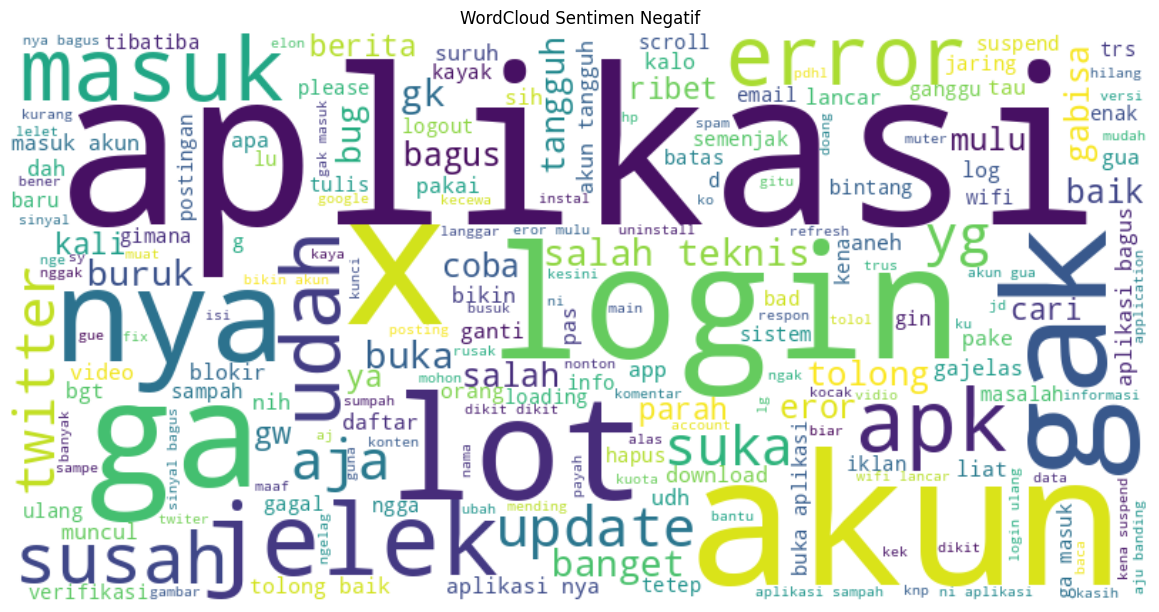

In [387]:
# Plot hasil wordcloud
plt.figure(figsize=(50, 50))
# Negatif
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('WordCloud Sentimen Negatif')
plt.axis('off')
plt.show()

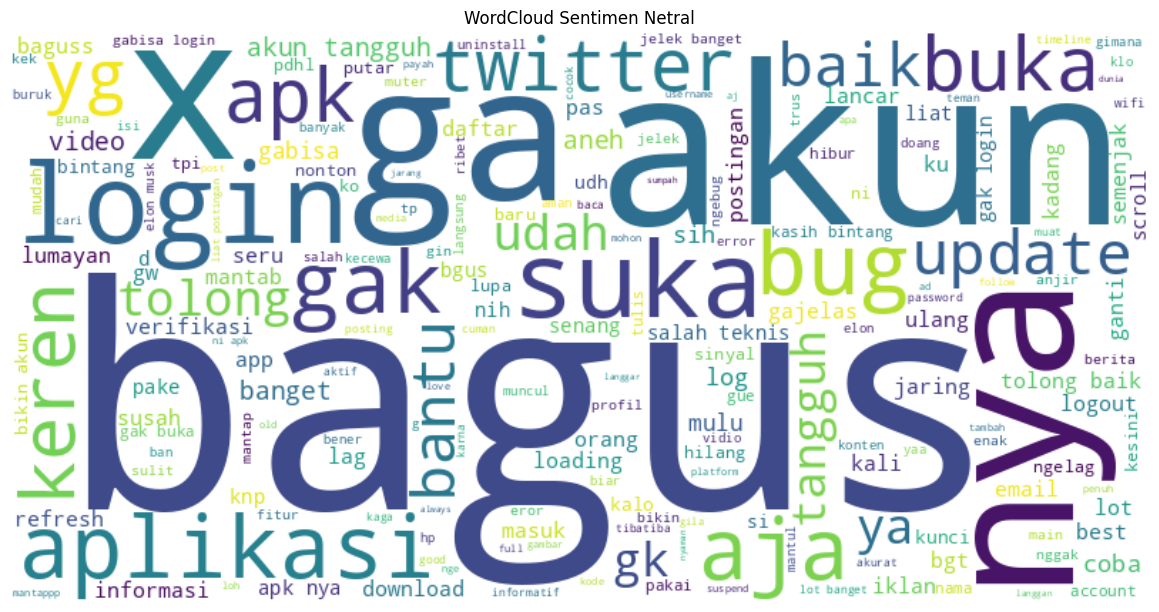

In [388]:
# Plot hasil wordcloud
plt.figure(figsize=(50, 50))
# Netral
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('WordCloud Sentimen Netral')
plt.axis('off')
plt.show()

# **Data Splitting**

In [412]:
# Data Splitting

# Pisahkan fitur (text akhir) dan target (Sentiment)
X = df['text akhir']
y = df['Sentiment']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Inisialisasi TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit dan transform data latih
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform data uji
X_test_tfidf = vectorizer.transform(X_test)

# **Modeling**

In [413]:
# Modeling

# Model yang akan digunakan
models = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

# Variabel untuk menyimpan hasil evaluasi
accuracy_train = []
accuracy_test = []
conf_matrices_train = []
conf_matrices_test = []

# Melatih dan mengevaluasi setiap model
for model_name, model in models.items():
    # Melatih model
    model.fit(X_train_tfidf, y_train)

    # Prediksi pada data latih dan data uji
    y_train_pred = model.predict(X_train_tfidf)
    y_test_pred = model.predict(X_test_tfidf)

    # Menghitung akurasi
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))

    # Matriks kebingunguan
    conf_matrices_train.append(confusion_matrix(y_train, y_train_pred))
    conf_matrices_test.append(confusion_matrix(y_test, y_test_pred))

# Menampilkan hasil evaluasi
for i, model_name in enumerate(models.keys()):
    print(f"\n{model_name} Model:")
    print(f"  Accuracy (Train): {accuracy_train[i]:.4f}")
    print(f"  Accuracy (Test): {accuracy_test[i]:.4f}")
    print(f"  Confusion Matrix (Train):\n {conf_matrices_train[i]}")
    print(f"  Confusion Matrix (Test):\n {conf_matrices_test[i]}")



Naive Bayes Model:
  Accuracy (Train): 0.8771
  Accuracy (Test): 0.7660
  Confusion Matrix (Train):
 [[1367   82    3]
 [ 160 1622   25]
 [  95  188  958]]
  Confusion Matrix (Test):
 [[145  21   0]
 [ 41 158   6]
 [ 19  30  80]]

Random Forest Model:
  Accuracy (Train): 1.0000
  Accuracy (Test): 0.8500
  Confusion Matrix (Train):
 [[1452    0    0]
 [   0 1807    0]
 [   0    0 1241]]
  Confusion Matrix (Test):
 [[145  20   1]
 [ 28 174   3]
 [ 13  10 106]]

Logistic Regression Model:
  Accuracy (Train): 0.9251
  Accuracy (Test): 0.8500
  Confusion Matrix (Train):
 [[1363   87    2]
 [  89 1694   24]
 [  10  125 1106]]
  Confusion Matrix (Test):
 [[142  23   1]
 [ 22 180   3]
 [  7  19 103]]

Decision Tree Model:
  Accuracy (Train): 1.0000
  Accuracy (Test): 0.8280
  Confusion Matrix (Train):
 [[1452    0    0]
 [   0 1807    0]
 [   0    0 1241]]
  Confusion Matrix (Test):
 [[138  20   8]
 [ 17 171  17]
 [  9  15 105]]
